In [1]:
!wget --header="Host: data.cdc.gov" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.106 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en;q=0.9,te-IN;q=0.8,te;q=0.7,en-GB;q=0.6,en-US;q=0.5" --header="Referer: https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-Profile/xigx-wn5e" --header="Cookie: _frontend_session=TmRCMjdOVGc4cEhMUmlNWHNkZEM4RXJ3UWY1anFUWC8wK2FvMjZJNkFHU0ttK2VONnFja29GUWtlaGdlOHAzVFBTSkMwWFV3YVVDZ2lua1lJTGNmUVY3cG4vRFNOditVRHorT084TkQ5WWkzcllZOGdmTGdUUW1JSHVFUUhKWWJHVkZrOHl2NmVZWFlPTDY3VWVEWS93PT0tLVR6R2l1eHVORGszM2lydWJlK3pPL2c9PQ%3D%3D--621fa5386f329df372b3d34d4508c9e47366a4c3; _ga=GA1.2.140835748.1624513012; _gid=GA1.2.1500883357.1624513012; _ga=GA1.3.140835748.1624513012; _gid=GA1.3.1500883357.1624513012; s_fid=44467FB867847BCD-31B12B44135A7857; gpv_c54=https%3A%2F%2Fdata.cdc.gov%2FCase-Surveillance%2FCOVID-19-Case-Surveillance-Public-Use-Data-Profile%2Fxigx-wn5e; s_vncm=1625077799379%26vn%3D1; s_ivc=true; s_lv_s=First%20Visit; s_visit=1; s_ips=701; gpv_v45=COVID-19%20Case%20Surveillance%20Public%20Use%20Data%20Profile%20%7C%20Data%20%7C%20Centers%20for%20Disease%20Control%20and%20Prevention; s_cc=true; socrata-csrf-token=PUSJfgi8SAvJmy98hD6+IQIaaBpi6c/Wa+gY3U9UclpEoph1TNCl44gV7LdU4DCMOq95EOQxMe/umRhHTN1Q5w==; s_ptc=0.00%5E%5E0.62%5E%5E0.00%5E%5E0.69%5E%5E1.41%5E%5E0.46%5E%5E4.09%5E%5E0.00%5E%5E6.83; s_tp=3024; s_ppv=COVID-19%2520Case%2520Surveillance%2520Public%2520Use%2520Data%2520Profile%2520%257C%2520Data%2520%257C%2520Centers%2520for%2520Disease%2520Control%2520and%2520Prevention%2C100%2C23%2C3024%2C4%2C4; s_tps=537; s_pvs=3522; s_lv=1624513548819; s_sq=%5B%5BB%5D%5D" --header="Connection: keep-alive" "https://data.cdc.gov/api/views/vbim-akqf/rows.csv?accessType=DOWNLOAD&bom=true&query=select+*" -c -O 'COVID-19_Case_Surveillance_Public_Use_Data.csv'

--2021-06-24 05:49:38--  https://data.cdc.gov/api/views/vbim-akqf/rows.csv?accessType=DOWNLOAD&bom=true&query=select+*
Resolving data.cdc.gov (data.cdc.gov)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cdc.gov (data.cdc.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘COVID-19_Case_Surveillance_Public_Use_Data.csv’

COVID-19_Case_Surve     [     <=>            ]   2.95G  1.44MB/s    in 44m 37s 

2021-06-24 06:34:15 (1.13 MB/s) - ‘COVID-19_Case_Surveillance_Public_Use_Data.csv’ saved [3170981998]



In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Problem Statement:
The COVID-19 pandemic has changed the world as we know it for people across all strata. For Data
 Scientists, especially those working with Healthcare and pharmaceutical organizations the implications
are far reaching and in most situations the business needs are changing rapidly.

### Questions to be answered via Data Analysis:
1. How does the exposure level govern the pandemic?
2. What is the nature of impact that comorbidity has on the pandemic and fatality rate?
3. Do missing values in data have any significance? (Is there any field intentionally left blank if so
what is the reason?)
4. What is the typical onset to disease maturity rate?
5. Can we definitively say that we have race influencing the pandemic?
6. What are other insights, key actions and strategies that can be recommended to CDC through
analysis of data?

#### Column Description:
1. cdc_case_earliest_dt  - The earlier of the Clinical Date (date related to the illness or specimen collection) or the Date Received by CDC.
2. current_status. - What is the current status of the person?
3. pos_spec_dt - Date of First positive Specimen collection.
4. onset_dt -  Date on which injury or illness occured.
5. hosp_yn - Hospitalization status.
6. death_yn - Death Status.
7. medcond_yn - Presence of underlying comorbidity (the condition of having two or more diseases at the same time) or disease.
8. icu_yn - ICU admission status.
9. race_ethnicity_combined - Race and ethnicity
10. age_group - The age group categorizations were populated using the age value
11. sex - Male; Female; Unknown; Other;


In [3]:
df=pd.read_csv('/content/COVID-19_Case_Surveillance_Public_Use_Data.csv',nrows=3887803)

In [4]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/01/13,NaN,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing
1,2020/11/30,2020/11/30,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
2,2020/11/21,2020/11/21,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,Unknown,Missing
3,2020/06/06,2020/06/19,NaN,2020/06/06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
4,2020/11/20,2020/11/21,2020/11/19,2020/11/20,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [5]:
df['death_yn'].value_counts(normalize=True)

No         0.529172
Missing    0.358169
Unknown    0.092447
Yes        0.020212
Name: death_yn, dtype: float64

In [6]:
df['cdc_report_dt'] = pd.to_datetime(df['cdc_report_dt'])
df['pos_spec_dt'] = pd.to_datetime(df['pos_spec_dt'])
df['onset_dt'] = pd.to_datetime(df['onset_dt'])

In [7]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/01/13,NaT,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing
1,2020/11/30,2020-11-30,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
2,2020/11/21,2020-11-21,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,Unknown,Missing
3,2020/06/06,2020-06-19,NaT,2020-06-06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
4,2020/11/20,2020-11-21,2020-11-19,2020-11-20,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


#### shape of the dataframe:

In [8]:
print(f"the number of rows in the dataset is {df.shape[0]} and the number of columns in the dataset is {df.shape[1]}")

the number of rows in the dataset is 3887803 and the number of columns in the dataset is 12


#### Number of nulls in the dataframe are:

In [9]:
df.isna().sum()

cdc_case_earliest_dt             0
cdc_report_dt               294238
pos_spec_dt                2917386
onset_dt                   1822031
current_status                   0
sex                              0
age_group                        0
race_ethnicity_combined          0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
dtype: int64

#### current_status field:

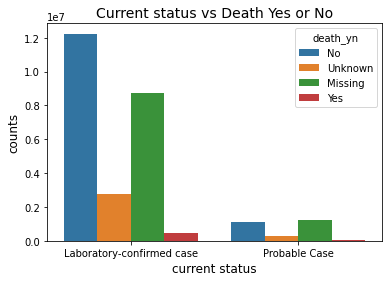

In [10]:
sns.countplot(x='current_status',hue='death_yn',data=df)
plt.title('Current status vs Death Yes or No',fontsize=14)
plt.xlabel("current status",fontsize=12)
plt.ylabel("counts",fontsize=12)
plt.show();

#### Observations:
1. Even there are some laboratory confirmed cases are high there are very less chances of death indicated by blue color.
2.  Also, another indicator is Missing data even though there is more laboratory confirmed cases.
3. Most of the data here categorized as  missing.

#### sex field:

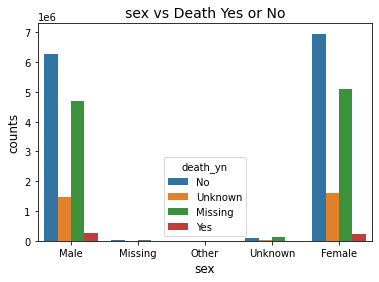

In [11]:
sns.countplot(x='sex',hue='death_yn',data=df)
plt.title('sex vs Death Yes or No',fontsize=14)
plt.xlabel("sex",fontsize=12)
plt.ylabel("counts",fontsize=12)
plt.show();

#### Observations:
1. If the sex is female there is less chances are dying than males but that is from the above data we cannot conclude from this visualizations alone.
2. Here also most of the data is missing to draw any conclusions.
3. Most of the data here categorized as  missing

#### race_ethnicity_combined field

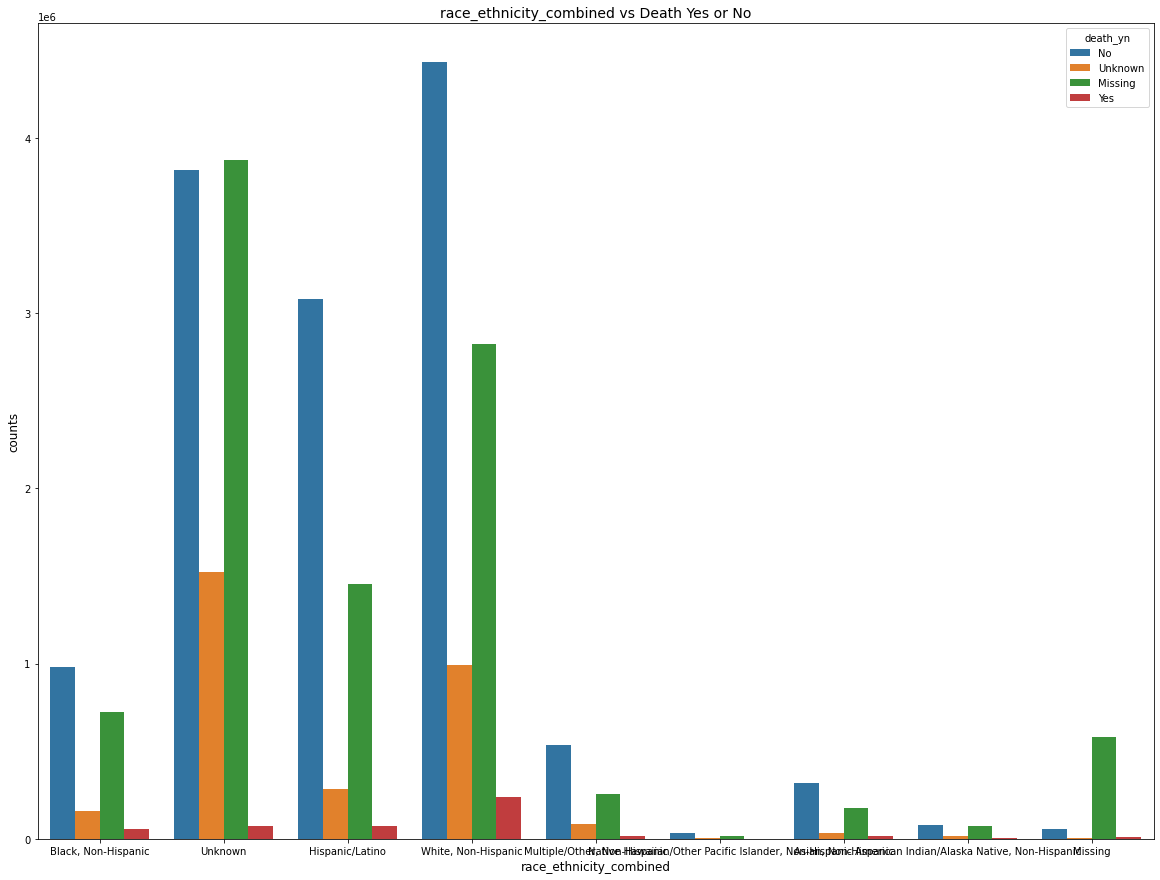

In [12]:
plt.figure(figsize=(20,15))
sns.countplot(x='race_ethnicity_combined',hue='death_yn',data=df)
plt.title('race_ethnicity_combined vs Death Yes or No',fontsize=14)
plt.xlabel("race_ethnicity_combined",fontsize=12)
plt.ylabel("counts",fontsize=12)
plt.show();

In [10]:
df.groupby(by=['race_ethnicity_combined'])['death_yn'].count().sort_values(ascending=False)

race_ethnicity_combined
White, Non-Hispanic                                     4253962
Unknown                                                 2959184
Hispanic/Latino                                         1740326
Black, Non-Hispanic                                      991866
Multiple/Other, Non-Hispanic                             345588
Missing                                                  290855
Asian, Non-Hispanic                                      156226
American Indian/Alaska Native, Non-Hispanic              130481
Native Hawaiian/Other Pacific Islander, Non-Hispanic      19302
Name: death_yn, dtype: int64

#### Observations:
1. From the above data, we can see that there is more impact on the White,Non-Hispanic Race followed by Hispanice/Latino.
2. Most of the data is categorized as missing here.

#### hosp_yn field 

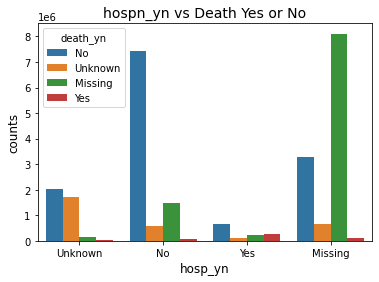

In [14]:
sns.countplot(x='hosp_yn',hue='death_yn',data=df)
plt.title('hospn_yn vs Death Yes or No',fontsize=14)
plt.xlabel("hosp_yn",fontsize=12)
plt.ylabel("counts",fontsize=12)
plt.show();

#### Observations:
1. Most of the data here categorized as missing.

#### icu_yn field

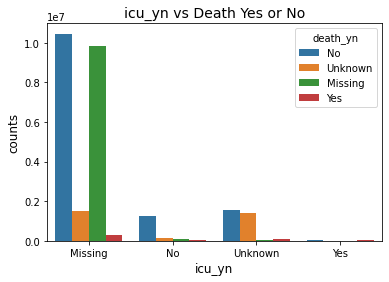

In [15]:
sns.countplot(x='icu_yn',hue='death_yn',data=df)
plt.title('icu_yn vs Death Yes or No',fontsize=14)
plt.xlabel("icu_yn",fontsize=12)
plt.ylabel("counts",fontsize=12)
plt.show();

### Observations:
1. Most of the data where the patient is in ICU or not is missing and there couldnt be much conclusive evidence can be drawn here.
2. Most of the data here categorized as missing.

#### medcond_yn field


* Pre medical conditions like diabetes and other chronic diseases existence of more than one disease at the same time.

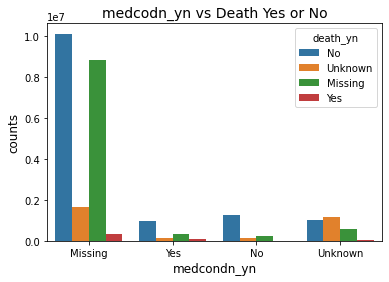

In [16]:
sns.countplot(x='medcond_yn',hue='death_yn',data=df)
plt.title('medcodn_yn vs Death Yes or No',fontsize=14)
plt.xlabel("medcondn_yn",fontsize=12)
plt.ylabel("counts",fontsize=12)
plt.show();

How long the duration in days from the first sample collected and from when the onset of the illness ?

* Onset date is the date the case first started to have symptoms. So once symptoms are evident then we will be looking for test to confirm whether there is a postitive or negative result.

* Positive Spec Date is  Date of First positive Specimen collection.


In [10]:
df['duration_taken']=df['pos_spec_dt']-df['onset_dt']

In [11]:
df['duration_taken'].describe()

count                        582479
mean      2 days 19:30:15.398666733
std      13 days 05:53:22.750388673
min             -405 days +00:00:00
25%                 0 days 00:00:00
50%                 2 days 00:00:00
75%                 4 days 00:00:00
max               394 days 00:00:00
Name: duration_taken, dtype: object

#### Observations:

1. once the patient identifies there are some symptoms  or first indications of the disease which is the onset date.
2. and the date on which the first specimen sample collected is the pos_spec_date.
3. So the mean number of days patients taken to visit the testing centre for giving the sample is 2 days. and variation of 14 days.

#### age_group field.

*  This field is already binned in between nearest 10 lets map to a proper age. by unbinning it

In [12]:
df['age_group'].value_counts()

60 - 69 Years    946005
50 - 59 Years    863979
20 - 29 Years    659325
40 - 49 Years    538310
10 - 19 Years    504843
70 - 79 Years     94179
0 - 9 Years       77397
80+ Years         75341
30 - 39 Years     68109
Missing           60315
Name: age_group, dtype: int64

In [13]:
age_dict= {'0 - 9 Years': 10,'10 - 19 Years':20,'20 - 29 Years':30,'30 - 39 Years':40,'40 - 49 Years':50,'50 - 59 Years':60,'60 - 69 Years':70,'70 - 79 Years':80,'80+ Years':90}

In [14]:
df['age'] = df['age_group'].map(age_dict)

In [16]:
df.tail()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,duration_taken,age
10887798,2020/10/25,2020-10-26,NaT,2020-10-25,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,Unknown,Missing,NaT,30.0
10887799,2021/02/04,2021-02-05,NaT,2021-02-04,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing,NaT,30.0
10887800,2021/04/13,2021-04-13,2021-04-13,2021-04-13,Probable Case,Female,20 - 29 Years,"White, Non-Hispanic",No,Unknown,No,No,0 days,30.0
10887801,2020/05/19,2020-05-19,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,No,Missing,NaT,30.0
10887802,2020/09/13,2020-09-13,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing,NaT,30.0


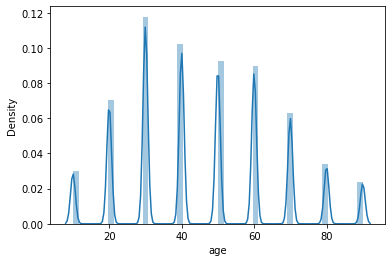

In [23]:
sns.distplot(df['age'])

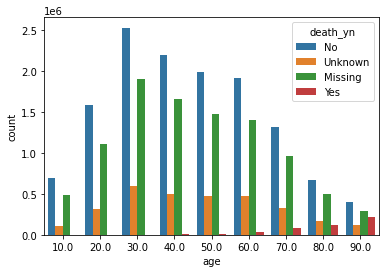

In [24]:
sns.countplot(x=df['age'], hue=df['death_yn'])

#### Observations:

* Working group are more prone to covid
* fatality rate is more in older people.

In [15]:
df['cdc_case_earliest_dt']=df['cdc_case_earliest_dt ']

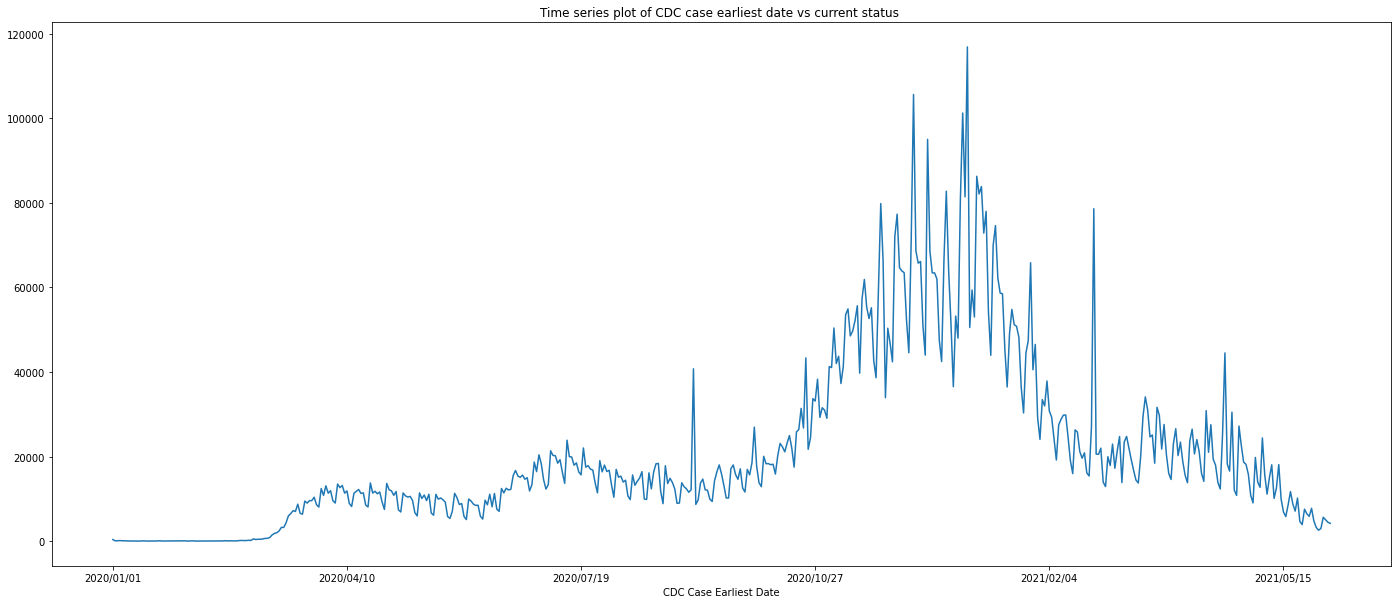

In [18]:
plt.figure(figsize=(24,10))
df.groupby(by=['cdc_case_earliest_dt'])['current_status'].count().plot();
plt.title("Time series plot of CDC case earliest date vs current status ")
plt.xlabel('CDC Case Earliest Date',fontsize=10)
plt.show();

#### Observations:
* From January 2020 to March 2020 there is constant growth been observed in the cases reporting.
* From October 2020 to April 2021 there is  like an exponential growth in the number of caes reporting.

In [16]:
df['race']=df['race_ethnicity_combined'].str.split(',').str[0]

In [17]:
race_list=df['race'].unique().tolist()

In [18]:
race_enthicity_df = df.groupby(by=['cdc_case_earliest_dt','current_status', 'race'])['sex'].count().reset_index()

In [19]:
lab_confirmed_df=race_enthicity_df[race_enthicity_df['current_status']=='Laboratory-confirmed case']
prob_case_df = race_enthicity_df[race_enthicity_df['current_status']=='Probable Case']

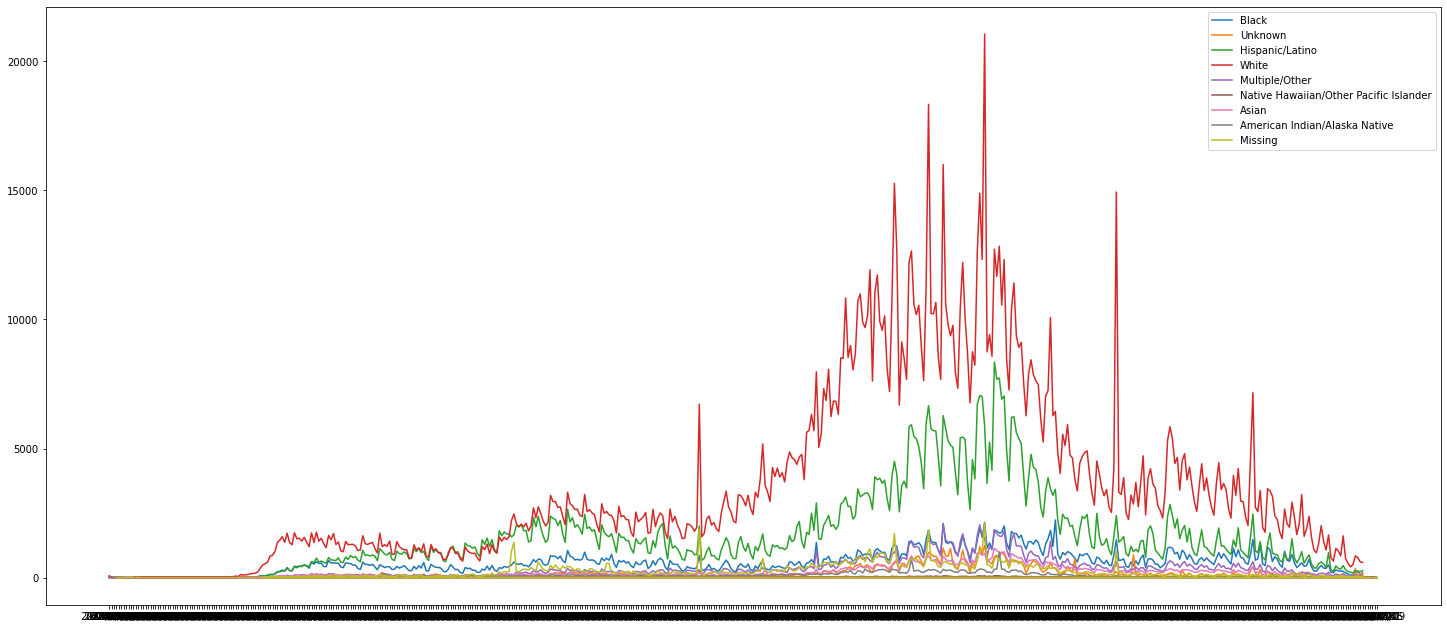

In [20]:
# Lab confirmed cases.
plt.figure(figsize=(25,11))
i=0
for race in race_list:
    plt.plot(lab_confirmed_df[lab_confirmed_df['race'] == race]['cdc_case_earliest_dt'],
             lab_confirmed_df[lab_confirmed_df['race'] == race]['sex'],
             label=race)
    i+=1
plt.legend()
plt.show()

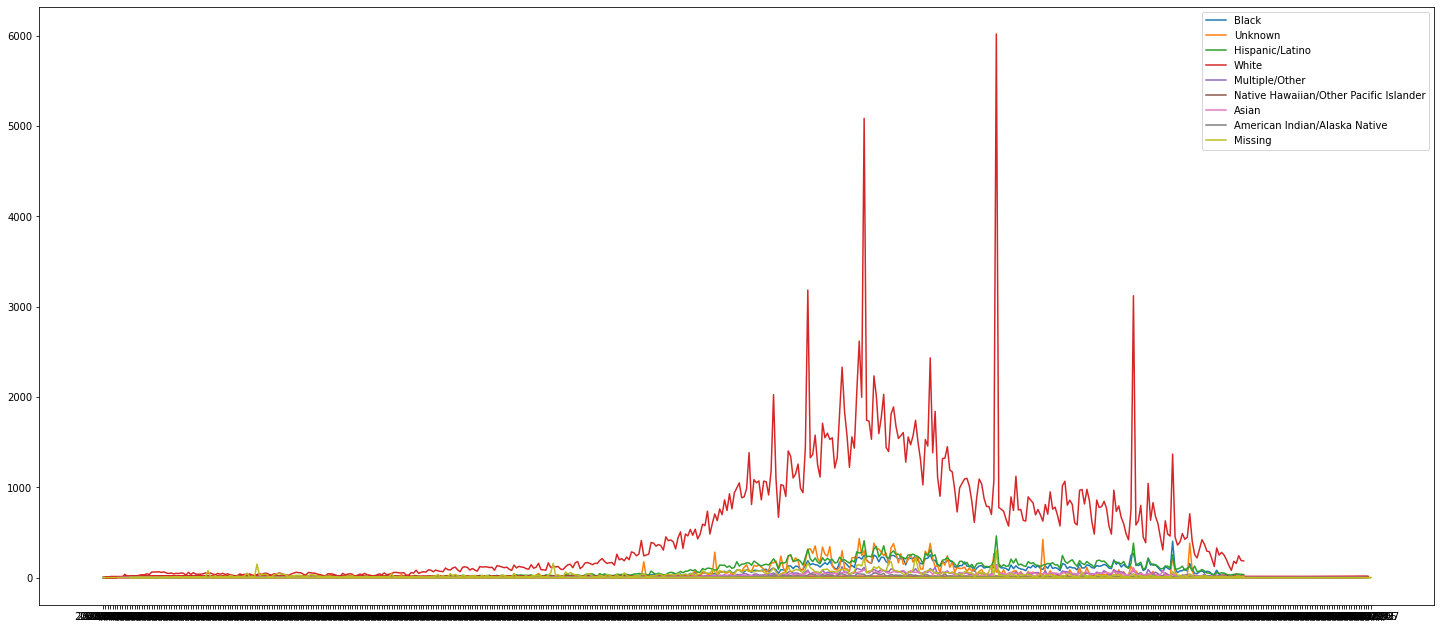

In [21]:
# Probable cases.
plt.figure(figsize=(25,11))
i=0
for race in race_list:
    plt.plot(prob_case_df[prob_case_df['race'] == race]['cdc_case_earliest_dt'],
             prob_case_df[prob_case_df['race'] == race]['sex'],
             label=race)
    i+=1
plt.legend()
plt.show()

## Presence of nulls in the data and drop the columns if there are more nulls in the data.

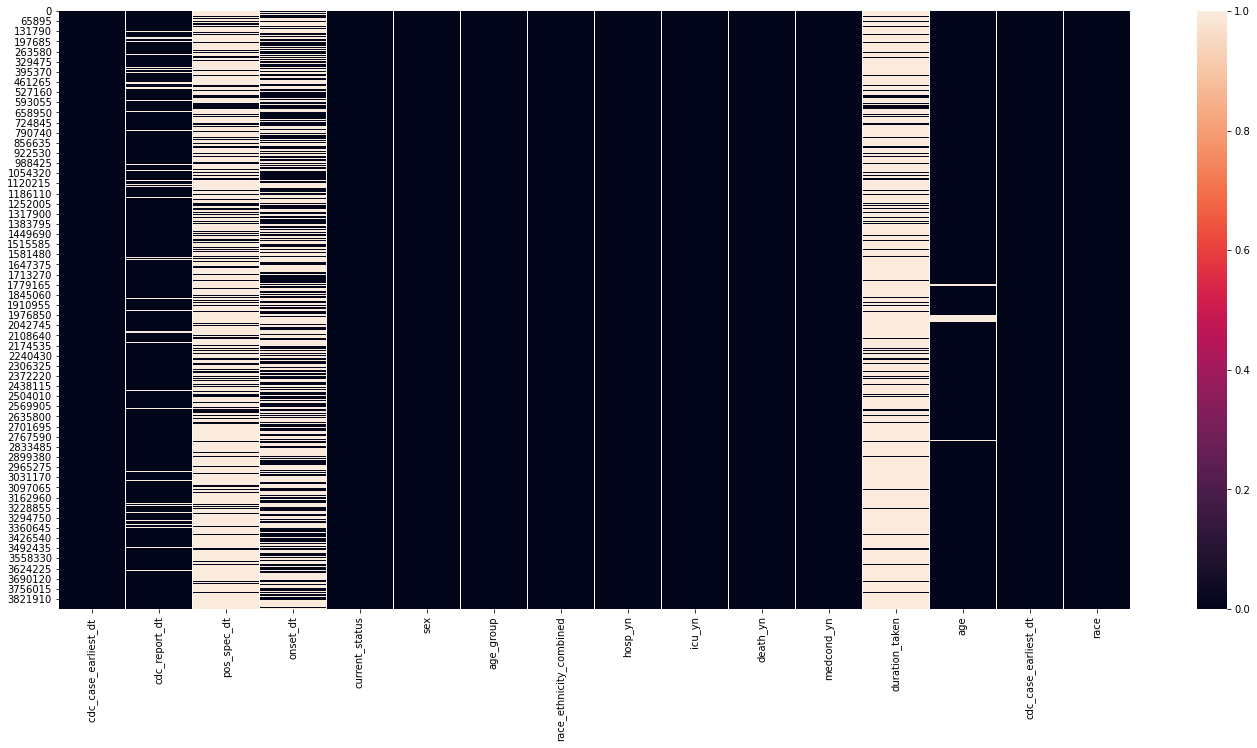

In [22]:
plt.figure(figsize=(24,11))
sns.heatmap(df.isna())
plt.show();

#### Observations:
1. pos_spec_dt , onset_dt and duration_taken are the most fields where most number of nulls are present , we will drop the columns.

In [28]:
final_df=df.drop(columns=['pos_spec_dt','onset_dt','duration_taken','cdc_case_earliest_dt ','age_group','race_ethnicity_combined'])

In [30]:
final_df.dropna(inplace=True)

In [31]:
final_df.shape

(3534023, 10)

In [32]:
final_df.isna().sum()

cdc_report_dt           0
current_status          0
sex                     0
hosp_yn                 0
icu_yn                  0
death_yn                0
medcond_yn              0
age                     0
cdc_case_earliest_dt    0
race                    0
dtype: int64

In [41]:
cat_cols=['current_status','sex','hosp_yn','icu_yn','death_yn','medcond_yn','race']
for cat in cat_cols:
  final_df[cat]=final_df[cat].astype('category')

In [44]:
final_df['cdc_case_earliest_dt']=pd.to_datetime(final_df['cdc_case_earliest_dt'])

In [45]:
final_df.dtypes

cdc_report_dt           datetime64[ns]
current_status                category
sex                           category
hosp_yn                       category
icu_yn                        category
death_yn                      category
medcond_yn                    category
age                            float64
cdc_case_earliest_dt    datetime64[ns]
race                          category
dtype: object

In [46]:
final_df.head()

,cdc_report_dt,current_status,sex,hosp_yn,icu_yn,death_yn,medcond_yn,age,cdc_case_earliest_dt,race
1,2020-11-30,Laboratory-confirmed case,Male,No,Missing,No,Missing,20.0,2020-11-30,Black
2,2020-11-21,Laboratory-confirmed case,Male,Unknown,Missing,Unknown,Missing,20.0,2020-11-21,Black
3,2020-06-19,Laboratory-confirmed case,Male,No,Missing,No,Missing,20.0,2020-06-06,Black
4,2020-11-21,Laboratory-confirmed case,Male,No,No,No,Yes,20.0,2020-11-20,Black
5,2020-12-16,Laboratory-confirmed case,Male,No,Missing,No,Missing,20.0,2020-12-05,Black


In [47]:
final_df=final_df.loc[:,['cdc_case_earliest_dt','cdc_report_dt','current_status','sex','hosp_yn','icu_yn','death_yn','medcond_yn','age','race']]

In [48]:
final_df.head()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,hosp_yn,icu_yn,death_yn,medcond_yn,age,race
1,2020-11-30,2020-11-30,Laboratory-confirmed case,Male,No,Missing,No,Missing,20.0,Black
2,2020-11-21,2020-11-21,Laboratory-confirmed case,Male,Unknown,Missing,Unknown,Missing,20.0,Black
3,2020-06-06,2020-06-19,Laboratory-confirmed case,Male,No,Missing,No,Missing,20.0,Black
4,2020-11-20,2020-11-21,Laboratory-confirmed case,Male,No,No,No,Yes,20.0,Black
5,2020-12-05,2020-12-16,Laboratory-confirmed case,Male,No,Missing,No,Missing,20.0,Black


There are 4 correlated variables from the above dataset are:
1. hosp_yn and death_yn
2. medcond_yn and death_yn
3. icu_yn and death_yn
4. age and death_yn

In [56]:
mapping_dict={'Yes':1,'No':0,'Missing':2,'Unknown':3}
final_df['hosp_yn']=final_df['hosp_yn'].map(mapping_dict)
final_df['medcond_yn']=final_df['medcond_yn'].map(mapping_dict)
final_df['icu_yn']=final_df['icu_yn'].map(mapping_dict)
final_df['death_yn']=final_df['death_yn'].map(mapping_dict)

In [64]:
for cat in ['hosp_yn','medcond_yn','icu_yn','death_yn']:
  final_df[cat]=final_df[cat].astype('int64')

In [66]:
temp_df=final_df[['hosp_yn','medcond_yn','icu_yn','death_yn','age']]

In [67]:
temp_df.corr()

,hosp_yn,medcond_yn,icu_yn,death_yn,age
hosp_yn,1.000000,0.272921,0.246413,0.471595,-0.011000
medcond_yn,0.272921,1.000000,0.407706,0.189031,-0.039230
icu_yn,0.246413,0.407706,1.000000,0.137221,-0.020638
death_yn,0.471595,0.189031,0.137221,1.000000,0.015511
age,-0.011000,-0.039230,-0.020638,0.015511,1.000000


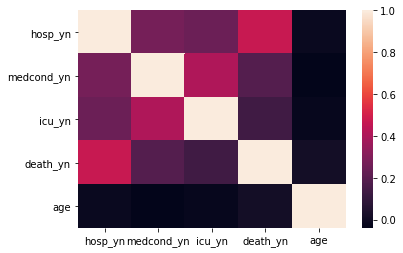

In [69]:
sns.heatmap(temp_df.corr());

In [70]:
final_df.to_csv('final_df.csv',index=False)

In [3]:
final_df=pd.read_csv('/content/drive/MyDrive/final_df.csv')

In [4]:
final_df.shape

(3534023, 10)

In [5]:
final_df.head()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,hosp_yn,icu_yn,death_yn,medcond_yn,age,race
0,2020-11-30,2020-11-30,Laboratory-confirmed case,Male,0,2,0,2,20.0,Black
1,2020-11-21,2020-11-21,Laboratory-confirmed case,Male,3,2,3,2,20.0,Black
2,2020-06-06,2020-06-19,Laboratory-confirmed case,Male,0,2,0,2,20.0,Black
3,2020-11-20,2020-11-21,Laboratory-confirmed case,Male,0,0,0,1,20.0,Black
4,2020-12-05,2020-12-16,Laboratory-confirmed case,Male,0,2,0,2,20.0,Black


#### lets check whether the death_yn and medcond_yn is dependent or independent of each other lets perform chi2 test to identify this.

--referred to the https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95


- Null Hypothesis (H0) - they are depedent on each other.
- Alternative Hypothesis (Ha) - they are independent on each other.


In [6]:
temp_df=final_df[['medcond_yn','death_yn']]

In [7]:
medcond_death_crosstab=pd.crosstab(temp_df['medcond_yn'],temp_df['death_yn'])

In [8]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency
chi2_value,p_value,dof,expected_values=chi2_contingency(medcond_death_crosstab.values)
print(chi2_value,p_value,dof)
print(expected_values)

304856.78419853334 0.0 9
[[ 135513.38706058    5375.42211242  102626.16968707   27443.02113993]
 [ 159804.55103999    6338.98197041  121022.20546273   32362.26152688]
 [1329564.88237343   52739.97369287 1006897.94704505  269252.19688865]
 [ 142577.179526      5655.6222243   107975.67780515   28873.52044455]]


In [9]:
significance=0.05
p=1-significance
critical_value=chi2.ppf(p,dof)
print(critical_value)

16.918977604620448


In [10]:
if chi2_value>critical_value:
  print(f"We reject the null hypothesis at siginficance level of {significance} both are the features are independent")
else:
  print(f"We fail to reject the null hypothesis at significance level of {significance} which means we both the featuers are dependent")

We reject the null hypothesis at siginficance level of 0.05 both are the features are independent


#### Similary we can perform for hospn_yn and death_yn

In [11]:
temp_df=final_df[['hosp_yn','death_yn']]
hospn_death_crosstab=pd.crosstab(temp_df['hosp_yn'],temp_df['death_yn'])
chi2_value,p_value,dof,expected_values=chi2_contingency(hospn_death_crosstab.values)
print(chi2_value,p_value,dof)
print(expected_values)

2308147.749745504 0.0 9
[[817015.82101192  32408.64246498 618737.42589508 165455.11062803]
 [111242.22815754   4412.65579766  84245.28403352  22527.83201128]
 [672590.17242955  26679.69684691 509361.87680669 136207.25391685]
 [166611.77840099   6609.00489046 126177.41326471  33740.80344384]]


In [12]:
significance=0.05
p=1-significance
critical_value=chi2.ppf(p_value,dof)
print(critical_value)

0.0


In [13]:
if chi2_value>critical_value:
  print(f"We reject the null hypothesis at siginficance level of {significance} both are the features are independent")
else:
  print(f"We fail to reject the null hypothesis at significance level of {significance} which means we both the featuers are dependent")

We reject the null hypothesis at siginficance level of 0.05 both are the features are independent


* But there are not enough evidences to conclude since there is lot of missing and unknown data and drawing conclusions from the above data is quite difficult.

### Building the Model.

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
final_df=pd.read_csv('/content/drive/MyDrive/final_df.csv',nrows=534023)

In [38]:
reverse_map={1:'Yes',0:'No',2:'Missing',3:'Unknown'}
final_df['hosp_yn']=final_df['hosp_yn'].map(reverse_map)
final_df['medcond_yn']=final_df['medcond_yn'].map(reverse_map)
final_df['icu_yn']=final_df['icu_yn'].map(reverse_map)
final_df['death_yn']=final_df['death_yn'].map(reverse_map)

In [39]:
final_df.to_csv('/content/drive/MyDrive/non_transformed.csv',index=False)

In [40]:
final_df.head()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,hosp_yn,icu_yn,death_yn,medcond_yn,age,race
0,2020-11-30,2020-11-30,Laboratory-confirmed case,Male,No,Missing,No,Missing,20.0,Black
1,2020-11-21,2020-11-21,Laboratory-confirmed case,Male,Unknown,Missing,Unknown,Missing,20.0,Black
2,2020-06-06,2020-06-19,Laboratory-confirmed case,Male,No,Missing,No,Missing,20.0,Black
3,2020-11-20,2020-11-21,Laboratory-confirmed case,Male,No,No,No,Yes,20.0,Black
4,2020-12-05,2020-12-16,Laboratory-confirmed case,Male,No,Missing,No,Missing,20.0,Black


In [41]:
final_df.replace('Unknown', np.nan, inplace=True)

In [42]:
final_df.dropna(inplace=True)

In [43]:
final_df['sex'] = final_df['sex'].map({'Female':0,'Male':1,'Unknown':2,'Missing':3,'Other':4})

In [44]:
final_df['age']=final_df['age'].apply(lambda x:int((x//10)-1))

In [45]:
final_df['hosp_yn'].value_counts()

No         231689
Missing    168277
Yes          7359
Name: hosp_yn, dtype: int64

In [46]:
final_df['current_status']=final_df['current_status'].map({'Laboratory-confirmed case':0,'Probable Case':1})

In [47]:
map_dict={'Yes':1,'No':0,'Missing':2}
final_df['hosp_yn']=final_df['hosp_yn'].map(map_dict)
final_df['medcond_yn']=final_df['medcond_yn'].map(map_dict)
final_df['icu_yn']=final_df['icu_yn'].map(map_dict)
final_df['death_yn']=final_df['death_yn'].map(map_dict)

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
final_df['race']=LabelEncoder().fit_transform(final_df['race'])

In [ ]:
necessary_cols=['current_status','sex','hosp_yn','icu_yn','medcond_yn','age','race']
target_cols=['death_yn']
for col in necessary_cols:
  print(final_df[col].value_counts())

In [51]:
X=final_df[necessary_cols]
y=final_df['death_yn']

In [52]:
print(f"the shape of X is {X.shape}")
print(f"the shape of y is {y.shape}")

the shape of X is (407325, 7)
the shape of y is (407325,)


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [54]:
print(f"the shape of X train is {X_train.shape}")
print(f"the shape of X test is {X_test.shape}")
print(f"the shape of y train is {y_train.shape}")
print(f"the shape of y test is {y_test.shape}")

the shape of X train is (272907, 7)
the shape of X test is (134418, 7)
the shape of y train is (272907,)
the shape of y test is (134418,)


In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred=lr.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(f"The accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"the classification report is {classification_report(y_test,y_pred)}")

The accuracy score is 0.8242794863783124
the classification report is               precision    recall  f1-score   support

           0       0.83      0.86      0.85     76429
           1       0.00      0.00      0.00       179
           2       0.81      0.78      0.79     57810

    accuracy                           0.82    134418
   macro avg       0.55      0.55      0.55    134418
weighted avg       0.82      0.82      0.82    134418



In [59]:
final_df['death_yn'].value_counts()

0    231601
2    175182
1       542
Name: death_yn, dtype: int64

### Imputing death yn field.

In [60]:
temp_df=final_df.copy()

In [61]:
temp_df['death_yn']=temp_df['death_yn'].map({0:0,1:1,2:'Missing'})

In [62]:
temp_df.head()

,cdc_case_earliest_dt,cdc_report_dt,current_status,sex,hosp_yn,icu_yn,death_yn,medcond_yn,age,race
0,2020-11-30,2020-11-30,0,1,0,2,0,2,1,0
2,2020-06-06,2020-06-19,0,1,0,2,0,2,1,0
3,2020-11-20,2020-11-21,0,1,0,0,0,1,1,0
4,2020-12-05,2020-12-16,0,1,0,2,0,2,1,0
5,2020-11-13,2020-11-19,0,1,0,2,0,2,1,0


In [63]:
temp_df['death_yn']=temp_df['death_yn'].replace('Missing', np.nan)

In [64]:
temp_df['death_yn'].value_counts()

0.0    231601
1.0       542
Name: death_yn, dtype: int64

In [65]:
cols=['current_status','sex','hosp_yn','icu_yn','medcond_yn','age','race','death_yn']

In [66]:
from sklearn.preprocessing import StandardScaler
temp=pd.DataFrame(StandardScaler().fit_transform(temp_df[cols]),columns=cols)

In [67]:
temp['death_yn'].isna().sum()

175182

In [68]:
temp.head()

,current_status,sex,hosp_yn,icu_yn,medcond_yn,age,race,death_yn
0,-0.271763,-0.008864,-0.862767,0.280753,0.376632,-1.342564,-1.788527,-0.048376
1,-0.271763,-0.008864,-0.862767,0.280753,0.376632,-1.342564,-1.788527,-0.048376
2,-0.271763,-0.008864,-0.862767,-3.580660,-1.307931,-1.342564,-1.788527,-0.048376
3,-0.271763,-0.008864,-0.862767,0.280753,0.376632,-1.342564,-1.788527,-0.048376
4,-0.271763,-0.008864,-0.862767,0.280753,0.376632,-1.342564,-1.788527,-0.048376


In [ ]:
temp['death_yn'].replace(np.nan,np.nan)

In [70]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
result=pd.DataFrame(imputer.fit_transform(temp),columns=temp.columns)

In [72]:
result.to_csv('/content/drive/MyDrive/exl_final_result.csv',index=False)

In [73]:
result.isna().sum()

current_status    0
sex               0
hosp_yn           0
icu_yn            0
medcond_yn        0
age               0
race              0
death_yn          0
dtype: int64

In [74]:
result['death_yn'].value_counts()

-0.048376     375188
 20.671432     30542
 10.311528      1595
Name: death_yn, dtype: int64

In [116]:
result.shape

(407325, 8)

In [120]:
X=result[['current_status','sex','hosp_yn','icu_yn','medcond_yn','age']]
y=result['death_yn']

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [102]:
print(f"the shape of X train is {X_train.shape}")
print(f"the shape of X test is {X_test.shape}")
print(f"the shape of y train is {y_train.shape}")
print(f"the shape of y test is {y_test.shape}")

the shape of X train is (272907, 6)
the shape of X test is (134418, 6)
the shape of y train is (272907,)
the shape of y test is (134418,)


In [103]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [126]:
model = Sequential([
Dense(16,activation='relu'),
Dense(8,activation='relu'),
Dense(4,activation='relu'),
Dense(1,activation='sigmoid')])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [128]:
history=model.fit(X_train, y_train, epochs=8, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/8
7889/7889 [==============================] - 13s 2ms/step - loss: 0.0110 - accuracy: 0.9958 - val_loss: 0.0110 - val_accuracy: 0.9958
Epoch 2/8
7889/7889 [==============================] - 13s 2ms/step - loss: 0.0107 - accuracy: 0.9958 - val_loss: 0.0122 - val_accuracy: 0.9958
Epoch 3/8
7889/7889 [==============================] - 13s 2ms/step - loss: 0.0107 - accuracy: 0.9958 - val_loss: 0.0115 - val_accuracy: 0.9958
Epoch 4/8
7889/7889 [==============================] - 13s 2ms/step - loss: 0.0106 - accuracy: 0.9958 - val_loss: 0.0111 - val_accuracy: 0.9958
Epoch 5/8
7889/7889 [==============================] - 13s 2ms/step - loss: 0.0105 - accuracy: 0.9958 - val_loss: 0.0108 - val_accuracy: 0.9958
Epoch 6/8
7889/7889 [==============================] - 13s 2ms/step - loss: 0.0105 - accuracy: 0.9958 - val_loss: 0.0107 - val_accuracy: 0.9958
Epoch 7/8
7889/7889 [==============================] - 13s 2ms/step - loss: 0.0104 - accuracy: 0.9958 - val_loss: 0.0107 - val_accuracy:

In [ ]:
history.history

In [130]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_80 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_81 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [133]:
print("Evaluate on test data")
evaluated_result = model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test accuracy:", evaluated_result)

print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
3886/3886 [==============================] - 4s 938us/step - loss: 0.0108 - accuracy: 0.9958
test loss, test accuracy: [0.010825695469975471, 0.9957696199417114]
Generate predictions for 3 samples
predictions shape: (3, 1)
